In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def file_path(question, ext):
    """
    This Function will be used to specify the csv file of the imported database
    ----
    Parameters :
    1. questions : String -> This is the Question that will be promt user to input file
    2. extension : String -> Allowed file extension, in this case is csv
    """
    while True:
        try:
            file = Path(input(question))
            if file.exists() and file.is_file and file.suffix in ext:
                return file
        except:
            print('File not suitable, please retry')

In [2]:
csv = file_path('Masukkan File CSV  : ','.csv')
dataset = pd.read_csv(csv)
dataset


Masukkan File CSV  :  SGTData_Pandas31012025A.csv


,Month,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,Jan-17,35058035.70,4205899.604,3.035133,9.153033,51331446.00
1,Feb-17,32749915.93,3738394.116,2.954104,9.865582,50819764.44
2,Mar-17,33460435.31,4277640.663,2.920290,9.388769,55697679.00
3,Apr-17,36270798.22,4595871.334,2.883726,10.063100,54963784.00
4,May-17,39840063.50,4517361.051,2.950965,10.078527,57712934.00
...,...,...,...,...,...,...
91,Aug-24,32144317.34,3940544.778,4.235707,13.529430,57964721.00
92,Sep-24,35126791.18,3835466.333,4.397071,14.363576,62507975.00
93,Oct-24,33005253.86,3795132.076,4.236191,13.794983,59739749.00
94,Nov-24,31986885.58,3566161.838,4.274417,14.770507,58881360.30


---
### Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

As noted earlier, you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

To perform a quick linearity check, you can use scatter diagrams (utilizing the matplotlib library).

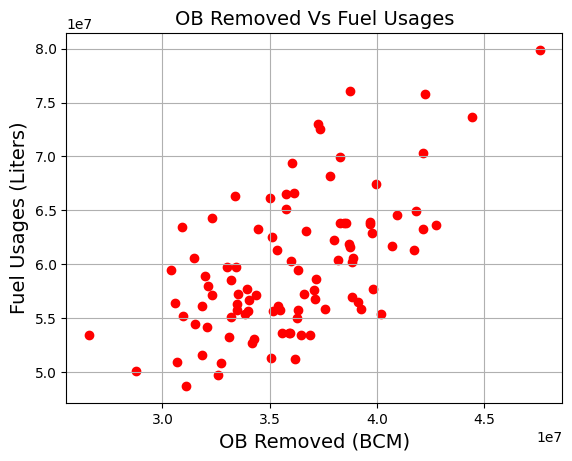

In [3]:
plt.scatter(dataset['OB (Bcm)'], dataset['Fuel'], color='red')
plt.title('OB Removed Vs Fuel Usages', fontsize=14)
plt.xlabel('OB Removed (BCM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

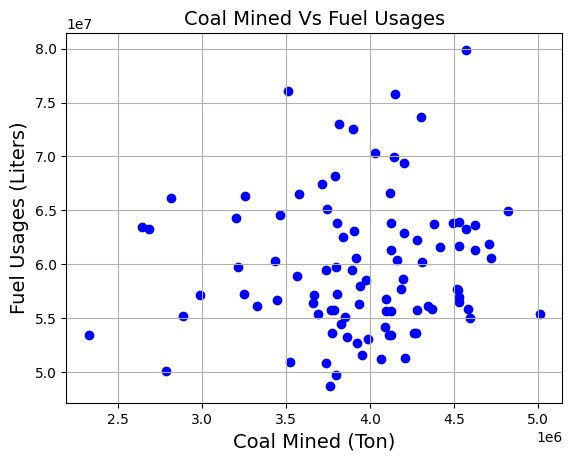

In [4]:
plt.scatter(dataset['Coal (Ton)'], dataset['Fuel'], color='blue')
plt.title('Coal Mined Vs Fuel Usages', fontsize=14)
plt.xlabel('Coal Mined (Ton)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

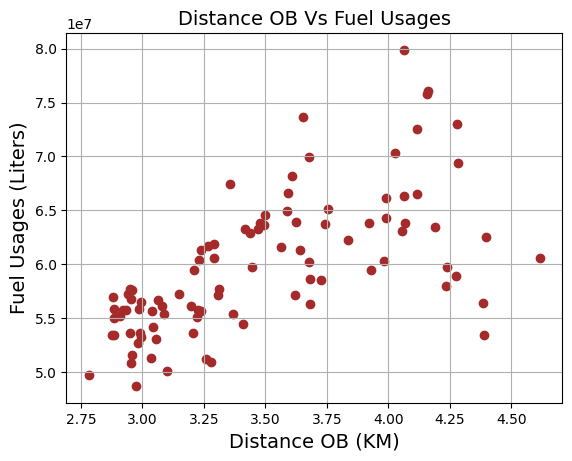

In [5]:
plt.scatter(dataset['Distance OB (KM)'], dataset['Fuel'], color='brown')
plt.title('Distance OB Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance OB (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

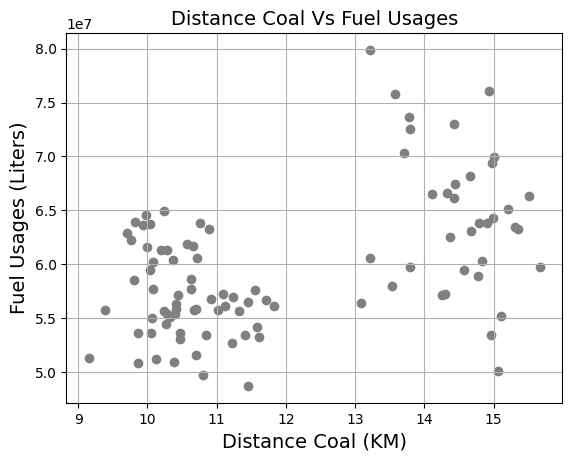

In [6]:
plt.scatter(dataset['Distance Coal (KM)'], dataset['Fuel'], color='gray')
plt.title('Distance Coal Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance Coal (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

From Linearity test above we found that OB Removed, and OB Distance have linier relantionship with Fuel Usages

In [7]:
from sklearn import linear_model
import statsmodels.api as sm

In [8]:
x = dataset[['OB (Bcm)','Distance OB (KM)']]
y = dataset['Fuel']
 
# Using sklearn

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: -->', regr.intercept_.round(3))
print('Coefficients: -->', regr.coef_.round(3))

# Using statsmodels

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: --> -6156355.695
Coefficients: --> [1.01900000e+00 8.39858684e+06]
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     141.1
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           6.80e-29
Time:                        15:46:35   Log-Likelihood:                -1572.5
No. Observations:                  96   AIC:                             3151.
Df Residuals:                      93   BIC:                             3159.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)
print(f'R² Score: {r2.round(3)}')
print(f'Root Mean Squared Error: {rmse.round(3)}')
print(f'Mean Squared Error: {mse.round(3)}')

R² Score: 0.752
Root Mean Squared Error: 3144536.897
Mean Squared Error: 9888112299133.838


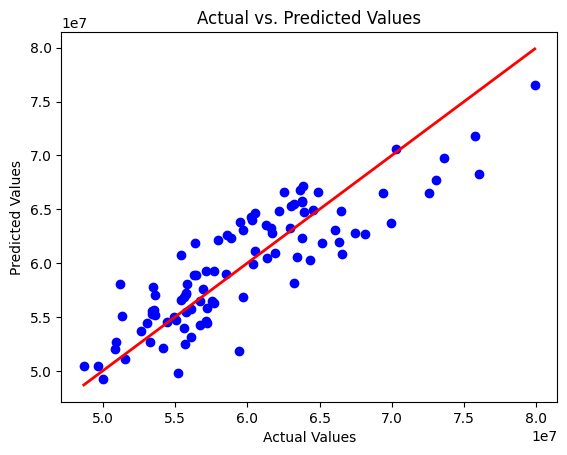

In [19]:
#Actual vs. Predicted Values

plt.scatter(y, predictions, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

In [23]:
x = dataset[['OB (Bcm)','Distance OB (KM)', 'Distance Coal (KM)']]
y = dataset['Fuel']
 
# Using sklearn

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: -->', regr.intercept_.round(3))
print('Coefficients: -->', regr.coef_.round(3))

# Using statsmodels

x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: --> -13042397.585
Coefficients: --> [1.12200000e+00 5.80237864e+06 1.01596952e+06]
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     136.2
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           1.01e-33
Time:                        15:54:07   Log-Likelihood:                -1558.1
No. Observations:                  96   AIC:                             3124.
Df Residuals:                      92   BIC:                             3135.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)
print(f'R² Score: {r2.round(3)}')
print(f'Root Mean Squared Error: {rmse.round(3)}')
print(f'Mean Squared Error: {mse.round(3)}')

R² Score: 0.816
Root Mean Squared Error: 2707685.18
Mean Squared Error: 7331559034190.747


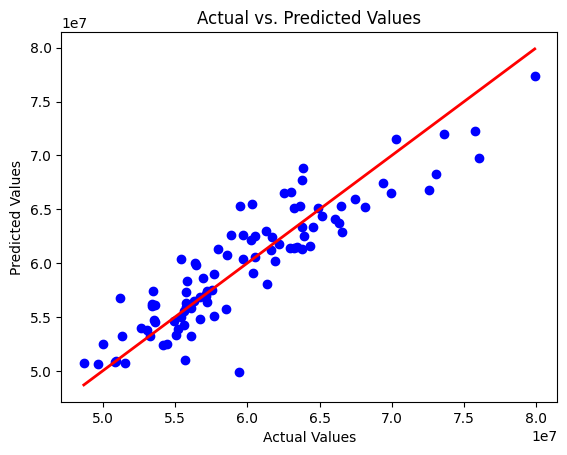

In [27]:
#Actual vs. Predicted Values

plt.scatter(y, predictions, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

## Test Data Prediction with Ridge Regresion

In [45]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the model
forest_regr = RandomForestRegressor(n_estimators=100)
forest_regr.fit(x, y)
 
# Make predictions
predictions = forest_regr.predict(x)

mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1655085298884.8708
Root Mean Squared Error: 1286501.184952766
R² Score: 0.9585095125580415
